##Install Dependencies

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##Upload the dataset


In [103]:
data = pd.read_csv('car data.csv')

##Analyze the dataset

In [104]:
data.shape

(301, 9)

In [105]:
data.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [106]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [107]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [108]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

<ipython-input-109-5b2bf9475608>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Year'])
<ipython-input-109-5b2bf9475608>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Present_Price'])
<ipython-input-109-5b2bf9475608>:11: UserWarning: 

`distplot` is a deprecated function and wil

Text(0.5, 1.0, 'Driven kms Distribution Plot')

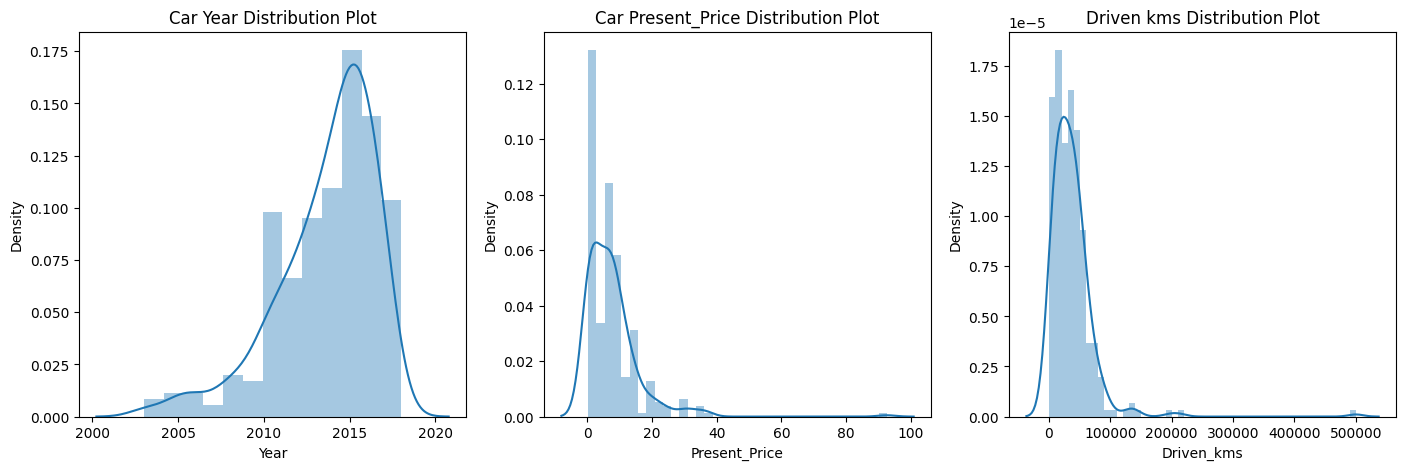

In [109]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(data['Year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(data['Present_Price'])
plt.title('Car Present_Price Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(data['Driven_kms'])
plt.title('Driven kms Distribution Plot')

##Dataset preprocessing

In [110]:
data['Fuel_Type'] = data['Fuel_Type'].astype('category')
data['Fuel_Type'] = data['Fuel_Type'].cat.codes
data['Selling_type'] = data['Selling_type'].astype('category')
data['Selling_type'] = data['Selling_type'].cat.codes
data['Transmission'] = data['Transmission'].astype('category')
data['Transmission'] = data['Transmission'].cat.codes

In [ ]:
X = data[['Car_Name', 'Year', 'Present_Price', 'Driven_kms','Fuel_Type','Selling_type','Transmission','Owner']]
y = data['Selling_Price']

##Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train["Car_Name"].value_counts()

corolla altis           15
city                    13
brio                     9
verna                    8
innova                   8
                        ..
alto 800                 1
Honda CB Hornet 160R     1
Bajaj Discover 100       1
Bajaj Pulsar RS200       1
TVS Wego                 1
Name: Car_Name, Length: 79, dtype: int64

In [ ]:
X_train.drop("Car_Name", axis = 1, inplace = True)
X_test.drop("Car_Name", axis = 1, inplace = True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 104 to 200
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           210 non-null    int64  
 1   Present_Price  210 non-null    float64
 2   Driven_kms     210 non-null    int64  
 3   Fuel_Type      210 non-null    int8   
 4   Selling_type   210 non-null    int8   
 5   Transmission   210 non-null    int8   
 6   Owner          210 non-null    int64  
dtypes: float64(1), int64(3), int8(3)
memory usage: 8.8 KB


##Linear Regressor

In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
print("R2_score is: ",r2_score(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

R2_score is:  0.925619067039847
Mean Squared Error:  1.8833598468259662


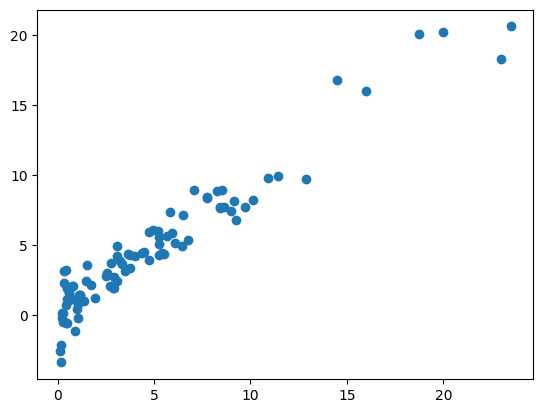

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

##Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("R2_score is: ",r2_score(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

R2_score is:  0.910582672342284
Mean Squared Error:  2.264088360000006


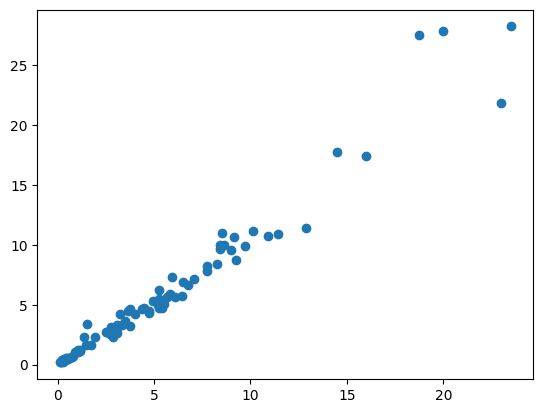

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

##Gradient Boosting Regressor

In [ ]:
gb = GradientBoostingRegressor(n_estimators = 100)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("R2_score is: ",r2_score(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

R2_score is:  0.9086705195284401
Mean Squared Error:  2.312504959352396


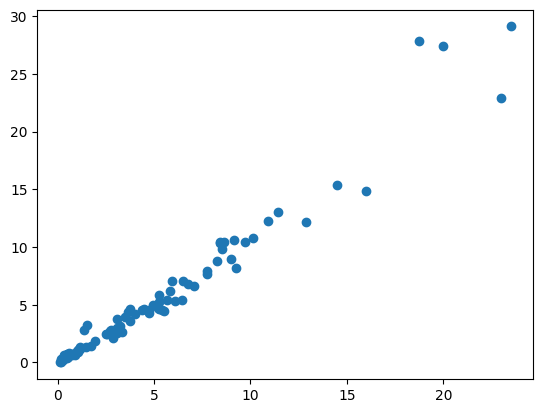

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()